In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Core Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
import re
from scipy import stats

#sklearn Imports
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
columns =['eventID', 'userID', 'SubType', 'Type', 'hr','r1','r2','r3','r4','r5','r6','r7','r8','r9','r10','r11','r12','r13','r14','r15','r16','r17','r18','r19','r20','r21','r22','r23','r24','r25','r26','r27','r28','r29','r30','r31','r32','r33','r34','r35','r36','r37','r38','r39','r40','r41','r42','r43','r44','r45','r46','r47','r48','r49','r50','r51','r52','r53','r54','r55','r56','r57','r58','r59','r60','r61','r62','r63','r64','r65','r66','r67','r68','r69','r70','r71','r72','r73','r74','r75','r76','r77','r78','r79','r80','r81','r82','r83','r84','r85','r86','r87','r88','r89','r90','r91','r92','r93','r94','r95','r96','r97','r98','r99','r100','r101','r102','r103','r104','r105','r106','r107','r108','r109','r110','r111','r112','r113','r114','r115','r116','r117','r118','r119','r120','r121','r122','r123','r124','r125']

df = pd.DataFrame()
for i in range(10):
    df_tmp = pd.read_csv('', header = None, names = columns)
    df = pd.concat([df, df_tmp])
df.head()


,eventID,userID,SubType,Type,hr,r1,r2,r3,r4,r5,...,r116,r117,r118,r119,r120,r121,r122,r123,r124,r125
5368,53,Seizure,Atonic/Fall,1,68,1392.0,1424.0,1376.0,1424.0,1504.0,...,1756.0,1620.0,1684.0,1468.0,1460.0,1732.0,1788.0,1516.0,1560.0,1660.0
5368,53,Seizure,Atonic/Fall,1,72,1828.0,1964.0,1764.0,1840.0,1788.0,...,1640.0,1408.0,1100.0,916.0,836.0,904.0,984.0,840.0,852.0,1816.0
5368,53,Seizure,Atonic/Fall,1,72,1496.0,2488.0,2776.0,2008.0,2484.0,...,3400.0,1864.0,1248.0,1276.0,1276.0,2532.0,1720.0,1508.0,1152.0,2216.0
5368,53,Seizure,Atonic/Fall,1,74,1148.0,1460.0,1164.0,868.0,1656.0,...,944.0,1096.0,1276.0,1384.0,1360.0,1504.0,1588.0,1508.0,1392.0,1440.0
5368,53,Seizure,Atonic/Fall,1,79,1484.0,1480.0,1452.0,1396.0,1408.0,...,2124.0,1668.0,1932.0,1832.0,1112.0,2192.0,2140.0,4504.0,1328.0,1580.0


### **View Distrubtion of Dataset by Class Type**







In [6]:
# Concatenate columns 'r1' to 'r125' into a new column called 'concatenated_values'
df['concatenated_values'] = df.loc[:, 'r1':'r125'].values.tolist()

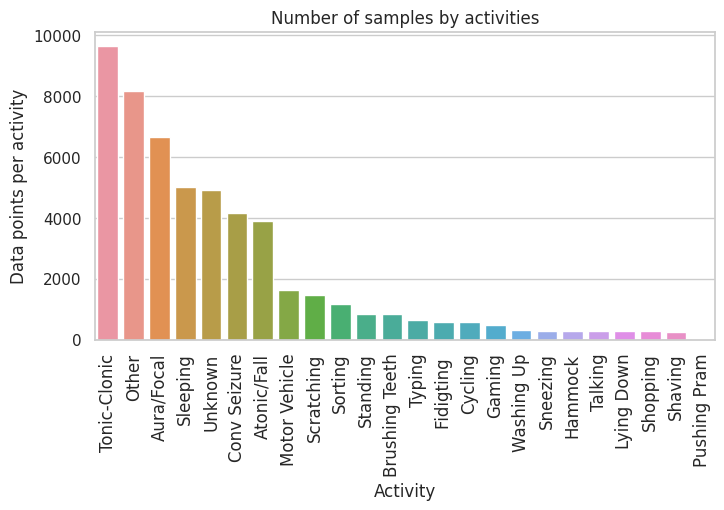

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Number of data points in class Tonic-Clonic = 9640 ~ 18.33%
Number of data points in class Other = 8170 ~ 15.53%
Number of data points in class Aura/Focal = 6650 ~ 12.64%
Number of data points in class Sleeping = 5010 ~ 9.52%
Number of data points in class Unknown = 4910 ~ 9.33%
Number of data points in class Conv Seizure = 4150 ~ 7.89%
Number of data points in class Atonic/Fall = 3890 ~ 7.4%
Number of data points in class Motor Vehicle = 1640 ~ 3.12%
Number of data points in class Scratching = 1460 ~ 2.78%
Number of data points in class Sorting = 1160 ~ 2.21%
Number of data points in class Standing = 840 ~ 1.6%
Number of data points in class Brushing Teeth = 840 ~ 1.6%
Number of data points in class Typing = 630 ~ 1.2%
Number of data points in class Fidigting  = 590 ~ 1.12%
Number of data points in class Cycling = 560 ~ 1.06%
Number of data points in class Gaming = 470 ~ 0.89%
Number o

In [7]:
# analysis of class labels
label_dict = dict(df['SubType'].value_counts())

sns.set_style("whitegrid")
plt.figure(figsize = (8, 4))
sns.barplot(x = list(label_dict.keys()), y = list(label_dict.values()))
plt.xlabel('Activity')
plt.ylabel('Data points per activity')
plt.title('Number of samples by activities')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90, fontsize=12)
plt.show()

# Percentage-wise distribution of the class label yi's
print("- "* 50)
for i in label_dict.keys():
  print("Number of data points in class {0} = {1} ~ {2}%".format(
  i, label_dict[i], round((label_dict[i]*100)/sum(label_dict.values()), 2)))

print("-"*50)
print("total datapoints:", sum(label_dict.values()))

### **View Distrubtion of Dataset by Class Type**







In [ ]:
# Create a new dataframe with separate columns for each value in 'rawData'
df_expanded = df['concatenated_values'].apply(pd.Series)

# Combine the expanded dataframe with the original dataframe
df_combined = pd.concat([df, df_expanded], axis=1)

# Melt the data to have a 'SubType' column and a 'Value' column
df_melted = df_combined.melt(id_vars=['SubType'], value_vars=df_expanded.columns, var_name='Index', value_name='Value')

### **Box Plot Analysis**





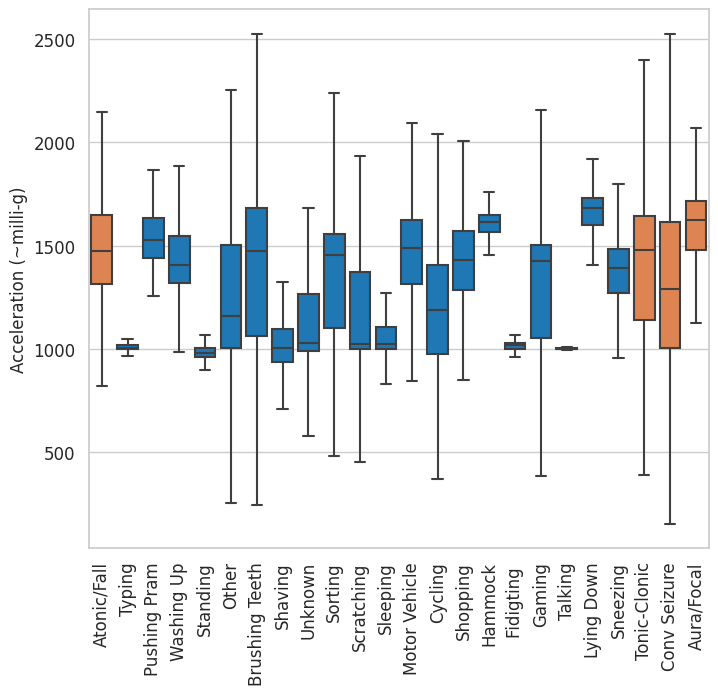

In [11]:
# Use to set style of the background of the plot
sns.set(style="whitegrid")

# Create a new dataframe with separate columns for each value in 'rawData'
df_expanded = df['concatenated_values'].apply(pd.Series)

# Combine the expanded dataframe with the original dataframe
df_combined = pd.concat([df, df_expanded], axis=1)

# Melt the data to have a 'SubType' column and a 'Value' column
df_melted = df_combined.melt(id_vars=['SubType'], value_vars=df_expanded.columns, var_name='Index', value_name='Value')

# Define the colors for the box plots based on SubType
color_dict = {
    'Atonic/Fall':'#dd8452', 'Typing':'tab:blue', 'Pushing Pram':'tab:blue', 'Washing Up':'tab:blue', 'Standing':'tab:blue',
       'Other':'tab:blue', 'Brushing Teeth':'tab:blue', 'Shaving':'tab:blue', 'Unknown':'tab:blue', 'Sorting':'tab:blue',
       'Scratching':'tab:blue', 'Sleeping':'tab:blue', 'Motor Vehicle':'tab:blue', 'Cycling':'tab:blue', 'Shopping':'tab:blue',
       'Hammock':'tab:blue', 'Fidigting ':'tab:blue', 'Gaming':'tab:blue', 'Talking':'tab:blue', 'Lying Down':'tab:blue',
       'Sneezing':'tab:blue', 'Tonic-Clonic':'#dd8452', 'Conv Seizure':'#dd8452', 'Aura/Focal':'#dd8452'
}

# Plot the boxplot and whiskers with the desired colors
plt.figure(figsize=(8,7))
sns.boxplot(x='SubType', y='Value', data=df_melted, showfliers=False, saturation=1, palette=color_dict)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Acceleration (~milli-g)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.show()

### **Numer of Events Distributed By Class**





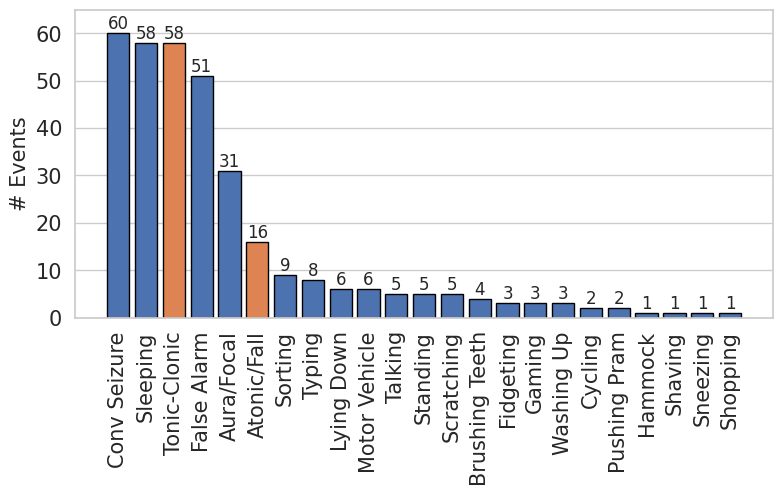

In [12]:
# Define the classes and values
Classes = ["Atonic/Fall", "Typing", "Pushing Pram", "Washing Up", "Standing", "Conv Seizure", "Brushing Teeth", "Shaving", "False Alarm", "Sorting", "Scratching", "Sleeping", "Motor Vehicle", "Cycling", "Shopping", "Hammock", "Fidgeting", "Gaming", "Talking", "Lying Down", "Sneezing", "Tonic-Clonic", "Aura/Focal"]
Values = [16, 8, 2, 3, 5, 60, 4, 1, 51, 9, 5, 58, 6, 2, 1, 1, 3, 3, 5, 6, 1, 58, 31]

# Create a DataFrame from the classes and values
df = pd.DataFrame({'Classes': Classes, 'Values': Values})

# Sort the DataFrame by the 'Values' column in descending order
df_sorted = df.sort_values('Values', ascending=False)

# Set the plot size
plt.figure(figsize=(9, 4))

# Define the colors for the bars
bar_colors = ['#dd8452' if category in ["Atonic/Fall", "Seizure", "Tonic-Clonic", "Aura"] else '#4c72b0' for category in df_sorted['Classes']]

# Create the bar plot with customized colors
plt.bar(df_sorted['Classes'], df_sorted['Values'], color=bar_colors, edgecolor='black', linewidth=1)

# Set the x-axis label, y-axis label, and title with increased font size
plt.xlabel('', fontsize=18)
plt.ylabel('# Events', fontsize=15)

# Rotate the x-axis labels for better visibility and set font size
plt.xticks(rotation=90, fontsize=15)

# Set font size for y-axis tick labels
plt.yticks(fontsize=15)

# Set font size for the tick labels on the axes
plt.tick_params(axis='both', which='major', labelsize=15)

# Add the value for each bar at the top
for i, value in enumerate(df_sorted['Values']):
    plt.text(i, value + 2, str(int(value)), ha='center', va='center', fontsize=12)

# Set the y-axis limit to 65
plt.ylim(0, 65)

# Remove horizontal grid lines
plt.grid(axis='x', linestyle='')

# Display the plot
plt.show()


### **FEATURE ENGINEERING**



In [ ]:
# Calculate statistical features
df['std'] = df['concatenated_values'].apply(lambda x: np.std(x))
df['mean'] = df['concatenated_values'].apply(lambda x: np.mean(x))
df['25%'] = df['concatenated_values'].apply(lambda x: np.percentile(x, 25))
df['50%'] = df['concatenated_values'].apply(lambda x: np.percentile(x, 50))
df['75%'] = df['concatenated_values'].apply(lambda x: np.percentile(x, 75))
df['iqr'] = df['75%'] - df['25%']
df['skew'] = df['concatenated_values'].apply(lambda x: pd.Series(x).skew())
df['kurtosis'] = df['concatenated_values'].apply(lambda x: pd.Series(x).kurtosis())
df['variance'] = df['concatenated_values'].apply(lambda x: np.var(x))
df['range'] = df['concatenated_values'].apply(lambda x: np.max(x) - np.min(x))
df['median'] = df['concatenated_values'].apply(lambda x: np.median(x))
df['min'] = df['concatenated_values'].apply(lambda x: np.min(x))

#Print New Dataframe with Extracted Statistical Features
df.head()

,eventID,userID,SubType,Type,hr,r1,r2,r3,r4,r5,...,25%,50%,75%,iqr,skew,kurtosis,variance,range,median,min
5368,53,Seizure,Atonic/Fall,1,68,1392.0,1424.0,1376.0,1424.0,1504.0,...,1356.0,1552.0,1756.0,400.0,0.500137,1.537889,129195.673600,2344.0,1552.0,616.0
5368,53,Seizure,Atonic/Fall,1,72,1828.0,1964.0,1764.0,1840.0,1788.0,...,1412.0,1556.0,1704.0,292.0,-0.383293,0.660879,80561.965056,1536.0,1556.0,712.0
5368,53,Seizure,Atonic/Fall,1,72,1496.0,2488.0,2776.0,2008.0,2484.0,...,1244.0,1672.0,2092.0,848.0,0.511244,0.295435,459153.766400,3516.0,1672.0,224.0
5368,53,Seizure,Atonic/Fall,1,74,1148.0,1460.0,1164.0,868.0,1656.0,...,1080.0,1132.0,1480.0,400.0,2.094325,4.355570,173600.649216,2040.0,1132.0,868.0
5368,53,Seizure,Atonic/Fall,1,79,1484.0,1480.0,1452.0,1396.0,1408.0,...,1408.0,1644.0,1936.0,528.0,2.744010,10.505866,408759.250944,4268.0,1644.0,636.0
